### STAT 207 Lab 10: Train/Test Classification ROC and Prediction

Due: Wednesday, November 20, 23:59:59

### Jaewon Kim jaewonk3

This lab consists of 2 main parts. You may add as many cells as you need in order to do the exercises. To add cells use the "Insert" tab from the menu bar above and select "insert cell above" or "insert cell below". 

Please use Markdown cells above or below your code cells to explain your results. Make sure graders know that you understand what your code is doing.

**Hint: all of the problems build on the class notes, so the notes are the first place to go for related examples and discussion.**


#### The code below generates training data and test data for you to analyze in this lab. Run the code and then work on the questions below.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
## Code to generate labeled data for classification
n = 500       # sample size
nX = 10       # number of explanatory features to generate
spread = 10   # standard deviation within clusters
# Generate labeled data:
X, y = make_blobs(n_samples=n, centers=2, n_features=nX, 
                  random_state=1, cluster_std=spread)
# Create variable names for X features
Xnames = []
for i in range(nX):
    list.append(Xnames, 'X'+str(i))
# load X into data frame
df = pd.DataFrame(X, columns=Xnames)
# Add y to the data frame
df['y'] = y
# split the data frame into training data (traindf) and testing data (testdf)
traindf, testdf = train_test_split(df, test_size=0.20, random_state=12347)

In [3]:
display(traindf.shape, traindf.head())

(400, 11)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,y
63,-6.435368,4.666490,-23.484677,9.072007,-10.691003,-23.004793,-12.199409,-26.137865,-2.382822,1.901212,0
143,1.845900,-8.716344,-10.384668,-20.111072,4.149295,-4.064223,-6.520965,-10.840402,10.672909,20.447352,0
365,-4.989501,-7.946010,-19.846998,-1.478810,-1.697234,4.612270,8.939545,5.623697,-1.725363,3.425534,0
487,-0.681983,19.252675,-4.042774,16.990513,2.792178,4.779663,9.518555,-0.937090,-4.949669,-21.225907,1
148,-13.311740,0.152300,-9.117352,-11.370951,-17.790135,-5.252814,-13.893143,-12.684104,-5.056183,3.631249,0


In [4]:
display(testdf.shape, testdf.head())

(100, 11)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,y
470,14.485931,9.929339,-29.479604,-1.435526,-20.052591,-4.367626,0.906620,-5.978525,5.057209,5.049409,1
144,7.907335,3.590790,5.294766,2.911478,10.106005,-16.195998,-3.272259,-7.384742,5.994483,-1.419187,0
22,0.589293,0.841541,-10.375409,9.685736,-13.426361,10.472702,-0.999738,-1.099517,-2.301751,-14.713002,1
494,-22.394710,27.180549,21.150294,1.048733,-9.949342,4.207245,2.025323,7.091138,-23.728960,-16.342430,1
106,-0.797608,8.652012,-10.150453,15.527657,-10.152889,-3.318075,-0.709750,-13.393106,-25.551252,-2.647719,1


### Part 1: Use the training data for model building (16 pts)

**a) (2 pts) Using the training data only, fit a logistic regression model that includes all 10 variables. Show the model summary and identify which if any variables have coefficients that are significant at level alpha = 0.05.**

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mod = smf.logit(formula = 'y ~ X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9', data = traindf).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.377564
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                           10
Date:                Tue, 19 Nov 2019   Pseudo R-squ.:                  0.4553
Time:                        20:47:08   Log-Likelihood:                -151.03
converged:                       True   LL-Null:                       -277.25
                                        LLR p-value:                 1.652e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1161      0.260     -0.447      0.655      -0.625       0.393
X0            -0.0081      0.014     -0.567      0.570      -0.036       0.020
X1            -0.0021      0.016     -0.135      0.892      -0.033       0.029
X2             0.0257      0.015      1.694      0.090      -0.004       0.056
X3             0.1061      0.016      6.437      0.000       0.074       0.138
X4            -0.0208      0.015     -1.413      0.158      -0.050       0.008
X5             0.1124      0.016      7.020      0.000       0.081       0.144
X6             0.0426      0.015      2.801      0.005       0.013       0.072
X7             0.0449      0.016      2.888      0.004       0.014       0.075
X8            -0.0563      0.015     -3.793      0.000      -0.085      -0.027
X9            -0.0639      0.015     -4.186      0.000      -0.094      -0.034
==============================================================================
"""

**AIC criterion for model selection:** The AIC criterion is one method for evaluating a fitted model. It is a function of negative log-likelihood (a measure of model fit), and number of parameters (complexity of the model). It aims to trade off model fit and model complexity to avoid 'overfitting' and enhance generalizability. When used as a model selection criterion, models with lower AIC are considered more generalizable than models with higher AIC. 

When using the statsmodels.formula.api logit method for fitting the model the AIC crieterion can be obtained from the fitted model using the .aic extension (e.g. model1.aic). 

**b) (1 pt) Display the AIC value for the model in a).**

In [6]:
mod.aic

324.05131651164226

**c) (8 pts) Using the training data only, and by fitting a bunch of different models with different subsets of the variables included, try to find a simplified model than uses less than 10 variables and satisfies the following conditions:**

+ **All variables included in the model (except possibly the intercept) have coefficient p-values below 0.05;**

+ **Among such models, the AIC is as small as possible.**

+ **Include the intercept in all models.**

**One strategy is to sequentially drop variables that are not significant and fit the resulting simplified model, checking for consistency with the conditions. In addition to your final model, make a list of the intermediate models you tried and their AIC values. identify the models by which variables are included, and indicate which variables were signficant in the model. You might list them in the following form, for example:**

| Model Variables | Least Significant variable | AIC |
| --- | --- | --- |
| X0, X1, ..., X9 | X5 (p=0.95) | etc. |
| etc. | etc. | etc. |
| X0, X1, X4 | X4 (p=0.041) | 68.33 |
| etc. | etc. | etc. |

**Another useful bit of information is that you can access the p-values from the fitted model using the .pvalues extension, e.g., model1.pvalues. That way you can avoid having to display the model summary for each model you try.**

In [7]:
mod2 = smf.logit(formula = 'y ~ X3 + X5 + X6 + X7 + X8 + X9', data = traindf).fit()
mod2.pvalues

Optimization terminated successfully.
         Current function value: 0.383951
         Iterations 7


Intercept    5.011499e-01
X3           7.200283e-11
X5           5.035771e-13
X6           4.881818e-03
X7           3.898269e-03
X8           1.616698e-04
X9           1.056252e-05
dtype: float64

In [8]:
mod2.aic

321.1607725023934

smf.logit(formula = 'y ~ X0 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9', data = traindf), X0, aic = 322.0696495576599

smf.logit(formula = 'y ~ X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9', data = traindf), X4 , aic = 320.3901011064893

smf.logit(formula = 'y ~ X2 + X3 + X5 + X6 + X7 + X8 + X9', data = traindf), X2, aic = 320.3727751111385

smf.logit(formula = 'y ~ X3 + X5 + X6 + X7 + X8 + X9', data = traindf), X6, aic = 
321.1607725023934

**d) (1 pts) Show the model summary for the final model you selected. Explain briefly why it is the best model you found.**

In [9]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Tue, 19 Nov 2019   Pseudo R-squ.:                  0.4461
Time:                        20:47:08   Log-Likelihood:                -153.58
converged:                       True   LL-Null:                       -277.25
                                        LLR p-value:                 1.513e-50
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1165      0.173     -0.673      0.501      -0.456       0.223
X3             0.1039      0.016      6.516      0.000       0.073       0.135
X5             0.1145      0.016      7.224      0.000       0.083       0.146
X6             0.0422      0.015      2.815      0.005       0.013       0.072
X7             0.0440      0.015      2.886      0.004       0.014       0.074
X8            -0.0544      0.014     -3.772      0.000      -0.083      -0.026
X9            -0.0666      0.015     -4.405      0.000      -0.096      -0.037
==============================================================================
"""

It has the lowest AIC with all of the coefficients are significant. 

**e) (4 pts) Treating your final model as a classifier, compute and display the 'naive' estimates of sensitivity and specificity using the training data. Use the classification threshold:**

+ **Classify as 1 if the predictive probability (model fitted value) is 0.5 or greater,**

+ **Classify as 0 if the predictive probability is less than 0.5.**

**A function to compute sensitivity and specificity was included in the class notes. You may include it in your code if helpful.**

In [10]:
phat = mod2.predict(exog = traindf[['X3', 'X5', 'X6', 'X7', 'X8', 'X9']])

In [11]:
from sklearn.metrics import confusion_matrix
def senspec(y, score, thresh):
    yhat = 1*(score >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred = yhat).ravel()
    sens = tp / (fn + tp)
    spec = tn / (fp + tn)
    return {'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp, 'sens': sens, 'spec': spec}

In [12]:
senspec(traindf['y'], phat, 0.5)

{'tn': 159,
 'fp': 40,
 'fn': 33,
 'tp': 168,
 'sens': 0.835820895522388,
 'spec': 0.7989949748743719}

### Part 2: Use the test data for model evaluation

**a) (4 pts) Using the model from Part 1d) as a classifier, with the same threshold as in Part 1e), use the test data to compute sensitivity and specificity. This will require classifying the test data and then computing the true positive, false negatives and so on. Display the code and results.**

In [13]:
phat2 = mod2.predict(exog = testdf[['X3', 'X5', 'X6', 'X7', 'X8', 'X9']])

In [14]:
senspec(testdf['y'], phat2, 0.5)

{'tn': 42,
 'fp': 9,
 'fn': 8,
 'tp': 41,
 'sens': 0.8367346938775511,
 'spec': 0.8235294117647058}

**b) (4 pts) Using the test data only for evaluation, compute and display the ROC curve for the model in Part 1d) that you developed from the training data. You may use any functions developed in the class notes for this purpose if helpful.**

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [16]:
def plot_roc(fpr, tpr, auc, lw = 2):
    plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'ROC curve (area = '+str(round(auc, 3))+')')
    plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = "lower right")
    plt.show()

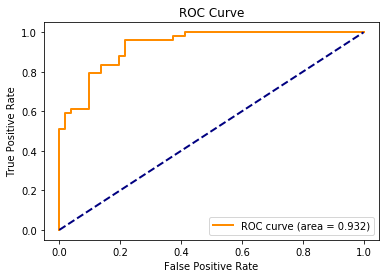

In [17]:
fpr, tpr, score = roc_curve(y_true = testdf['y'], y_score = phat2)
auc = roc_auc_score(y_true = testdf['y'], y_score = phat2)
plot_roc(fpr, tpr, auc)

**c) (1 pt) Comment on how the sensitivity and specificity compare between the 'naive' values computed from the training data, and the unbiased values computed using the test data. Are the results similar or is one of the results more optimistic than the other.**

Compared to the result based on training data, the result based on test data has higher sensitivity and specificity. Thus, the result with test data is more optimistic but the results are similar. 